In [ ]:
#pip install -q seaborn
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 30.6 MB/s 
     |████████████████████████████████| 135 kB 56.6 MB/s 
     |████████████████████████████████| 1.6 MB 43.7 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib import colors
#import xgboost as xgb
#
import os
import sys
#
from datetime import datetime, timedelta
from time import time
from uuid import uuid4
from scipy.ndimage import convolve1d
import numpy as np
import pandas as pd
import tensorflow as tf

import autokeras as ak

#
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import cross_validate
# 
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
train_data = pd.read_csv('/content/training_dataset.csv')
train_data

,Unnamed: 0,observation_id,observation_timestamp,hour_of_day,register__sales_dollar_amt_this_hour,register__payment_types_accepted,register__peak_sales_dollar_amt_per_hour,register__sales_dollar_amt_last_hour,register__sales_quantity_last_hour,register__sales_quantity_rescanned_frac,...,region__sales_dollar_amt_last_hour,region__returns_dollar_amt_last_hour,region__nighttime_open_registers,region__nighttime_service_time_per_customer,region__nighttime_sales_amt_per_hour,region__nighttime_returns_amt_per_hour,region__peak_sales_dollar_amt_per_hour,region__peak_sales_dollar_amt_per_hour_v2,region__peak_returns_dollar_amt_per_hour,region__peak_returns_dollar_amt_per_hour_v2
0,0,704d2a80-d52e-11ec-90ff-c7e6292284b3,2022-05-16 15:39:57,15,347.29,Cash+Credit,-0.7383,-0.1270,-0.1993,-0.8299,...,-0.6920,-0.4605,-0.5180,-1.0062,-0.6462,-0.6030,-0.4773,0.1748,-1.7951,-0.8284
1,1,1cacc1d0-e6ac-11ec-b65d-156af70ce36b,2022-06-07 21:52:23,21,361.59,Cash+Credit,0.6483,-0.0362,-0.0777,-0.7395,...,-0.6531,-0.4434,-0.6498,0.9031,-0.6493,-0.6106,0.4998,-0.9816,0.8939,-0.8614
2,2,6dc2b330-d37a-11ec-884e-dfe9ea4a7bd5,2022-05-14 11:38:52,11,850.73,Cash+Credit,-0.4950,-0.1268,-0.1974,1.3139,...,-0.6120,-0.1786,-0.6040,-1.4229,-0.6456,-0.6037,1.9337,-0.9093,2.4046,-0.7567
3,3,163ee0a0-0cca-11ed-a73c-8904b24187cc,2022-07-26 10:02:41,10,1175.69,Cash+Credit,-0.5594,-0.1270,-0.1991,-0.8299,...,-0.5472,0.1246,-0.5925,-1.4097,-0.6478,-0.6079,0.1288,-0.9093,-0.4983,-0.7567
4,4,5e3c5df0-d5ee-11ec-a5f2-3b6f99e95850,2022-05-17 14:33:50,14,3204.53,Cash+Credit,0.5693,-0.1221,-0.1632,-0.7071,...,-0.3838,0.1996,-0.5696,1.1231,-0.6475,-0.6032,1.0050,0.1748,1.5660,0.2356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,18507,a964e4b0-ec3b-11ec-aec9-4b767285cfe5,2022-06-14 23:42:33,23,847.42,Cash+Credit,-0.6241,-0.1265,-0.1969,-0.5497,...,-0.4608,-0.1132,-0.5868,-1.4072,-0.6468,-0.6081,-0.7843,-0.9093,-0.7026,-0.7567
18508,18508,d05f4d40-e39d-11ec-91c5-7d7dff01d67c,2022-06-04 00:32:28,0,359.95,Cash+Credit,-0.0539,-0.0978,-0.1347,0.5278,...,-0.6506,-0.4419,-0.6498,0.8966,-0.6493,-0.6106,0.4998,-0.9816,0.8939,-0.8614
18509,18509,6ad63b10-c718-11ec-84c8-55432c3a896a,2022-04-28 17:27:02,17,1377.07,Cash+Credit,0.0668,-0.0468,0.0330,-0.1237,...,-0.6587,-0.4486,-0.6155,1.6430,-0.6492,-0.6103,-1.2383,-0.8250,-1.9593,-0.8559
18510,18510,86067f80-0cff-11ed-9fa3-3f7cf690f9aa,2022-07-26 16:25:12,16,1586.16,Cash+Credit,-0.3656,-0.0073,0.5781,-0.3706,...,-0.4792,0.2355,-0.5925,-1.4097,-0.6477,-0.6079,0.1288,-0.9093,-0.3080,-0.7567


In [ ]:
test_data = pd.read_csv("/content/test_dataset.csv")
test_data

,observation_id,observation_timestamp,hour_of_day,register__payment_types_accepted,register__peak_sales_dollar_amt_per_hour,register__sales_dollar_amt_last_hour,register__sales_quantity_last_hour,register__sales_quantity_rescanned_frac,register__sales_payments_declined_frac,register__peak_returns_dollar_amt_per_hour,...,region__sales_dollar_amt_last_hour,region__returns_dollar_amt_last_hour,region__nighttime_open_registers,region__nighttime_service_time_per_customer,region__nighttime_sales_amt_per_hour,region__nighttime_returns_amt_per_hour,region__peak_sales_dollar_amt_per_hour,region__peak_sales_dollar_amt_per_hour_v2,region__peak_returns_dollar_amt_per_hour,region__peak_returns_dollar_amt_per_hour_v2
0,3f483640-bc52-11ec-b736-8544dc068949,15/04/2022 00:23,0,Cash+Credit,0.5693,-0.1253,-0.1489,-0.8176,-0.1066,0.9103,...,-0.6373,-0.3791,-0.5581,-0.7148,-0.6487,-0.6091,1.0020,-0.5479,0.8761,NaN
1,a88b0bb0-d2ae-11ec-bd0e-f5a7c7895456,13/05/2022 11:20,11,Cash+Credit,0.3084,-0.1270,-0.1986,1.6562,-0.1247,-0.5251,...,-0.6483,-0.4419,-0.6498,0.8867,-0.6493,-0.6106,-1.9779,-0.9816,-0.1311,-0.8614
2,90611780-d607-11ec-a5d8-675445c92326,17/05/2022 17:34,17,Cash+Credit,-0.6757,0.1925,0.2534,-0.7517,-0.1247,-0.5251,...,0.6712,0.3971,2.0094,0.0464,1.8275,2.0689,0.0332,1.3795,-0.3489,1.3382
3,a98380e0-e2d2-11ec-b28f-7f4d381958ee,03/06/2022 00:18,0,Cash+Credit,-0.1747,-0.1258,-0.1709,-0.3576,-0.1247,-0.5251,...,-0.6653,-0.4437,-0.6498,0.8937,-0.6493,-0.6106,0.4998,-0.9816,0.8939,-0.8614
4,608b8e60-e4f2-11ec-8115-d3258731976b,05/06/2022 17:10,17,Cash+Credit,0.6483,-0.0612,-0.0995,0.1060,-0.1247,-0.5251,...,-0.6495,-0.4418,-0.6498,0.9006,-0.6493,-0.6106,0.4998,-0.9816,0.8939,-0.8614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,c2799ab0-12ea-11ed-8968-872ef03a44a9,03/08/2022 05:11,5,Cash+Credit,-0.4950,-0.1182,0.0632,0.3578,-0.1247,-0.5251,...,-0.6186,-0.2082,-0.5925,-1.4092,-0.6476,-0.6079,1.0397,-0.9093,-0.3033,-0.7567
5175,a69043b0-1305-11ed-aad2-618d9ed6342d,03/08/2022 08:24,8,Cash+Credit,-0.5594,-0.1259,-0.1739,-0.6560,-0.1247,-0.5251,...,-0.5358,-0.0782,-0.5925,-1.4092,-0.6476,-0.6079,1.0397,-0.9093,-0.3033,-0.7567
5176,830e7a40-1357-11ed-ac06-3b7cca007c7f,03/08/2022 18:10,18,Cash+Credit,-0.5594,-0.1055,0.2060,1.0873,-0.1247,-0.5251,...,-0.4510,0.0836,-0.5925,-1.4092,-0.6476,-0.6079,1.0397,-0.9093,-0.3033,-0.7567
5177,5f085980-1344-11ed-830d-f58e3d413565,03/08/2022 15:53,15,Cash+Credit,-0.6175,-0.1270,-0.1990,-0.8299,-0.1247,-0.5251,...,-0.5863,-0.1806,-0.5925,-1.4092,-0.6476,-0.6079,1.0397,-0.9093,-0.3033,-0.7567


In [ ]:
train_data.isna().sum()

Unnamed: 0                                        0
observation_id                                    0
observation_timestamp                             0
hour_of_day                                       0
register__sales_dollar_amt_this_hour              0
                                               ... 
region__nighttime_returns_amt_per_hour            0
region__peak_sales_dollar_amt_per_hour            0
region__peak_sales_dollar_amt_per_hour_v2       198
region__peak_returns_dollar_amt_per_hour          0
region__peak_returns_dollar_amt_per_hour_v2    1900
Length: 63, dtype: int64

In [ ]:
test_data.isna().sum()

observation_id                                   0
observation_timestamp                            0
hour_of_day                                      0
register__payment_types_accepted                 0
register__peak_sales_dollar_amt_per_hour         0
                                              ... 
region__nighttime_returns_amt_per_hour           0
region__peak_sales_dollar_amt_per_hour           0
region__peak_sales_dollar_amt_per_hour_v2      100
region__peak_returns_dollar_amt_per_hour         0
region__peak_returns_dollar_amt_per_hour_v2    568
Length: 61, dtype: int64

In [ ]:
train_data["region__peak_sales_dollar_amt_per_hour_v2"].fillna(train_data["region__peak_sales_dollar_amt_per_hour_v2"].median(),inplace=True)
train_data["region__peak_returns_dollar_amt_per_hour_v2"].fillna(train_data["region__peak_returns_dollar_amt_per_hour_v2"].median(),inplace=True)

In [ ]:
test_data["region__peak_sales_dollar_amt_per_hour_v2"].fillna(test_data["region__peak_sales_dollar_amt_per_hour_v2"].median(),inplace=True)
test_data["region__peak_returns_dollar_amt_per_hour_v2"].fillna(test_data["region__peak_returns_dollar_amt_per_hour_v2"].median(),inplace=True)

In [ ]:
train_data.isna().sum()

Unnamed: 0                                     0
observation_id                                 0
observation_timestamp                          0
hour_of_day                                    0
register__sales_dollar_amt_this_hour           0
                                              ..
region__nighttime_returns_amt_per_hour         0
region__peak_sales_dollar_amt_per_hour         0
region__peak_sales_dollar_amt_per_hour_v2      0
region__peak_returns_dollar_amt_per_hour       0
region__peak_returns_dollar_amt_per_hour_v2    0
Length: 63, dtype: int64

In [ ]:
test_data.isna().sum()

observation_id                                 0
observation_timestamp                          0
hour_of_day                                    0
register__payment_types_accepted               0
register__peak_sales_dollar_amt_per_hour       0
                                              ..
region__nighttime_returns_amt_per_hour         0
region__peak_sales_dollar_amt_per_hour         0
region__peak_sales_dollar_amt_per_hour_v2      0
region__peak_returns_dollar_amt_per_hour       0
region__peak_returns_dollar_amt_per_hour_v2    0
Length: 61, dtype: int64

In [ ]:
train_data = train_data.drop(train_data.columns[[0, 1,2,60,62]], axis=1)
train_data

,hour_of_day,register__sales_dollar_amt_this_hour,register__payment_types_accepted,register__peak_sales_dollar_amt_per_hour,register__sales_dollar_amt_last_hour,register__sales_quantity_last_hour,register__sales_quantity_rescanned_frac,register__sales_payments_declined_frac,register__peak_returns_dollar_amt_per_hour,register__returns_dollar_amt_last_hour,...,region__mean_service_time_per_customer,region__stdev_service_time_per_customer,region__sales_dollar_amt_last_hour,region__returns_dollar_amt_last_hour,region__nighttime_open_registers,region__nighttime_service_time_per_customer,region__nighttime_sales_amt_per_hour,region__nighttime_returns_amt_per_hour,region__peak_sales_dollar_amt_per_hour,region__peak_returns_dollar_amt_per_hour
0,15,347.29,Cash+Credit,-0.7383,-0.1270,-0.1993,-0.8299,-0.1247,-0.5721,-0.2582,...,-0.9255,-0.3891,-0.6920,-0.4605,-0.5180,-1.0062,-0.6462,-0.6030,-0.4773,-1.7951
1,21,361.59,Cash+Credit,0.6483,-0.0362,-0.0777,-0.7395,-0.1135,-0.5251,-0.2157,...,0.7815,0.0663,-0.6531,-0.4434,-0.6498,0.9031,-0.6493,-0.6106,0.4998,0.8939
2,11,850.73,Cash+Credit,-0.4950,-0.1268,-0.1974,1.3139,0.1075,-0.5251,-0.2579,...,-1.2559,-0.4826,-0.6120,-0.1786,-0.6040,-1.4229,-0.6456,-0.6037,1.9337,2.4046
3,10,1175.69,Cash+Credit,-0.5594,-0.1270,-0.1991,-0.8299,-0.1247,-0.5251,-0.2582,...,-1.2280,-0.4809,-0.5472,0.1246,-0.5925,-1.4097,-0.6478,-0.6079,0.1288,-0.4983
4,14,3204.53,Cash+Credit,0.5693,-0.1221,-0.1632,-0.7071,-0.1247,0.7604,-0.2565,...,0.2442,-0.3021,-0.3838,0.1996,-0.5696,1.1231,-0.6475,-0.6032,1.0050,1.5660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,23,847.42,Cash+Credit,-0.6241,-0.1265,-0.1969,-0.5497,-0.1247,-0.5721,-0.2579,...,-1.2594,-0.4844,-0.4608,-0.1132,-0.5868,-1.4072,-0.6468,-0.6081,-0.7843,-0.7026
18508,0,359.95,Cash+Credit,-0.0539,-0.0978,-0.1347,0.5278,-0.1177,-0.5251,-0.2197,...,1.0555,0.3173,-0.6506,-0.4419,-0.6498,0.8966,-0.6493,-0.6106,0.4998,0.8939
18509,17,1377.07,Cash+Credit,0.0668,-0.0468,0.0330,-0.1237,-0.1247,-0.5251,-0.0982,...,0.4589,-0.5111,-0.6587,-0.4486,-0.6155,1.6430,-0.6492,-0.6103,-1.2383,-1.9593
18510,16,1586.16,Cash+Credit,-0.3656,-0.0073,0.5781,-0.3706,-0.0531,-0.5251,1.4750,...,-1.2331,-0.4801,-0.4792,0.2355,-0.5925,-1.4097,-0.6477,-0.6079,0.1288,-0.3080


In [ ]:
test_data = test_data.drop(test_data.columns[[0, 1,58,60]], axis=1)
test_data

,hour_of_day,register__payment_types_accepted,register__peak_sales_dollar_amt_per_hour,register__sales_dollar_amt_last_hour,register__sales_quantity_last_hour,register__sales_quantity_rescanned_frac,register__sales_payments_declined_frac,register__peak_returns_dollar_amt_per_hour,register__returns_dollar_amt_last_hour,register__returns_quantity_last_hour,...,region__mean_service_time_per_customer,region__stdev_service_time_per_customer,region__sales_dollar_amt_last_hour,region__returns_dollar_amt_last_hour,region__nighttime_open_registers,region__nighttime_service_time_per_customer,region__nighttime_sales_amt_per_hour,region__nighttime_returns_amt_per_hour,region__peak_sales_dollar_amt_per_hour,region__peak_returns_dollar_amt_per_hour
0,0,Cash+Credit,0.5693,-0.1253,-0.1489,-0.8176,-0.1066,0.9103,-0.1930,-0.2177,...,-0.1320,0.3398,-0.6373,-0.3791,-0.5581,-0.7148,-0.6487,-0.6091,1.0020,0.8761
1,11,Cash+Credit,0.3084,-0.1270,-0.1986,1.6562,-0.1247,-0.5251,-0.2581,-0.2601,...,0.8413,0.1972,-0.6483,-0.4419,-0.6498,0.8867,-0.6493,-0.6106,-1.9779,-0.1311
2,17,Cash+Credit,-0.6757,0.1925,0.2534,-0.7517,-0.1247,-0.5251,0.8384,0.7034,...,-0.3185,-0.4461,0.6712,0.3971,2.0094,0.0464,1.8275,2.0689,0.0332,-0.3489
3,0,Cash+Credit,-0.1747,-0.1258,-0.1709,-0.3576,-0.1247,-0.5251,-0.2304,-0.2174,...,0.8032,0.1548,-0.6653,-0.4437,-0.6498,0.8937,-0.6493,-0.6106,0.4998,0.8939
4,17,Cash+Credit,0.6483,-0.0612,-0.0995,0.1060,-0.1247,-0.5251,-0.2169,-0.1434,...,0.9011,0.1806,-0.6495,-0.4418,-0.6498,0.9006,-0.6493,-0.6106,0.4998,0.8939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,5,Cash+Credit,-0.4950,-0.1182,0.0632,0.3578,-0.1247,-0.5251,0.3549,0.2286,...,-1.2398,-0.4849,-0.6186,-0.2082,-0.5925,-1.4092,-0.6476,-0.6079,1.0397,-0.3033
5175,8,Cash+Credit,-0.5594,-0.1259,-0.1739,-0.6560,-0.1247,-0.5251,-0.1764,-0.1956,...,-1.2369,-0.4859,-0.5358,-0.0782,-0.5925,-1.4092,-0.6476,-0.6079,1.0397,-0.3033
5176,18,Cash+Credit,-0.5594,-0.1055,0.2060,1.0873,-0.1247,-0.5251,0.5987,0.4257,...,-1.2705,-0.4859,-0.4510,0.0836,-0.5925,-1.4092,-0.6476,-0.6079,1.0397,-0.3033
5177,15,Cash+Credit,-0.6175,-0.1270,-0.1990,-0.8299,-0.1247,-0.5251,-0.2582,-0.2612,...,-1.2350,-0.4844,-0.5863,-0.1806,-0.5925,-1.4092,-0.6476,-0.6079,1.0397,-0.3033


In [ ]:
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('register__sales_dollar_amt_this_hour')

In [ ]:
train_labels.dtypes

dtype('float64')

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_features['register__payment_types_accepted'])
train_features['register__payment_types_accepted'] = le.transform(train_features['register__payment_types_accepted'])
#LabelEncoder()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_features['register__payment_types_accepted'])
test_features['register__payment_types_accepted'] = le.transform(test_features['register__payment_types_accepted'])
#LabelEncoder()

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(train_features['store__type_code'])
train_features['store__type_code'] = le.transform(train_features['store__type_code'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(test_features['store__type_code'])
test_features['store__type_code'] = le.transform(test_features['store__type_code'])

In [ ]:
train_features['hour_of_day'] = train_features['hour_of_day'].astype('float64')
train_features['hour_of_day']

0        15.0
1        21.0
2        11.0
3        10.0
4        14.0
         ... 
18507    23.0
18508     0.0
18509    17.0
18510    16.0
18511    20.0
Name: hour_of_day, Length: 18512, dtype: float64

In [ ]:
test_features['hour_of_day'] = test_features['hour_of_day'].astype('float64')
test_features['hour_of_day']

0        0.0
1       11.0
2       17.0
3        0.0
4       17.0
        ... 
5174     5.0
5175     8.0
5176    18.0
5177    15.0
5178    13.0
Name: hour_of_day, Length: 5179, dtype: float64

In [ ]:
train_features['store__type_code'] = train_features['store__type_code'].astype('float64')
train_features['store__type_code']

0        0.0
1        0.0
2        0.0
3        0.0
4        3.0
        ... 
18507    0.0
18508    2.0
18509    0.0
18510    0.0
18511    0.0
Name: store__type_code, Length: 18512, dtype: float64

In [ ]:
test_features['store__type_code'] = test_features['store__type_code'].astype('float64')
test_features['store__type_code']

0       2.0
1       2.0
2       0.0
3       2.0
4       2.0
       ... 
5174    0.0
5175    0.0
5176    0.0
5177    0.0
5178    0.0
Name: store__type_code, Length: 5179, dtype: float64

In [ ]:
train_features['register__payment_types_accepted']
train_features['register__payment_types_accepted'] = train_features['register__payment_types_accepted'].astype('float64')

In [ ]:
test_features['register__payment_types_accepted']
test_features['register__payment_types_accepted'] = test_features['register__payment_types_accepted'].astype('float64')

In [ ]:
len(train_features.columns)

57

In [ ]:

len(test_features.columns)

57

In [ ]:
train_features.dtypes

hour_of_day                                    float64
register__payment_types_accepted               float64
register__peak_sales_dollar_amt_per_hour       float64
register__sales_dollar_amt_last_hour           float64
register__sales_quantity_last_hour             float64
register__sales_quantity_rescanned_frac        float64
register__sales_payments_declined_frac         float64
register__peak_returns_dollar_amt_per_hour     float64
register__returns_dollar_amt_last_hour         float64
register__returns_quantity_last_hour           float64
register__returns_quantity_rescanned_frac      float64
cashier__title_level                           float64
cashier__n_years_experience                    float64
cashier__hours_into_shift                      float64
cashier__item_scan_rate_per_min                float64
cashier__item_manual_entry_rate_per_min        float64
store__type_code                               float64
store__miles_to_nearest_location               float64
store__tar

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[12.317  0.123  0.003  0.001  0.001 -0.014  0.002  0.007  0.003  0.003
  -0.024 -0.002 -0.02   0.006 -0.001 -0.001  0.709  0.03  -0.023  0.001
   0.016 -0.012  0.002  0.008  0.014 -0.044  0.003  0.006 -0.026 -0.001
  -0.005 -0.002 -0.021 -0.03  -0.023 -0.031 -0.01   0.002  0.003  0.
  -0.027 -0.002 -0.     0.007 -0.004  0.014  0.017  0.021  0.006  0.018
   0.007  0.015  0.022  0.018  0.016 -0.019  0.009]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[15.    0.   -0.74 -0.13 -0.2  -0.83 -0.12 -0.57 -0.26 -0.26 -0.53 -2.6
  -2.54  1.06  0.92  0.68  0.    0.46 -0.01  0.84 -0.64  0.06 -0.37  0.17
   0.46 -0.39 -0.63 -0.71 -0.44 -0.57  0.07 -0.88 -0.56  0.64  0.18  0.38
  -0.31 -0.55 -0.59 -0.01 -0.41 -0.43 -0.53 -0.33 -0.28 -0.76 -0.6  -0.93
  -0.39 -0.69 -0.46 -0.52 -1.01 -0.65 -0.6  -0.48 -1.8 ]]

Normalized: [[ 0.35 -0.36 -0.74 -0.11 -0.18 -0.83 -0.12 -0.57 -0.24 -0.24 -0.53 -2.59
  -2.52  1.06  0.91  0.67 -0.74  0.44  0.01  0.83 -0.66  0.07 -0.37  0.16
   0.45 -0.37 -0.63 -0.72 -0.43 -0.57  0.08 -0.88 -0.55  0.68  0.2   0.42
  -0.3  -0.54 -0.58 -0.01 -0.39 -0.43 -0.52 -0.33 -0.29 -0.77 -0.61 -0.95
  -0.4  -0.7  -0.45 -0.53 -1.05 -0.66 -0.62 -0.46 -1.79]]


In [ ]:
trainjuni = np.array(train_features[['store__n_open_registers', 
    'cashier__item_scan_rate_per_min',
    'register__peak_sales_dollar_amt_per_hour',
    'register__sales_quantity_rescanned_frac',
    'store__occupancy_outdoors',
    'region__n_open_registers',
    'region__peak_sales_dollar_amt_per_hour',
    'hour_of_day']])

juni_normalizer = layers.Normalization(input_shape=[8,], axis=None)
juni_normalizer.adapt(trainjuni)

In [ ]:
testjuni = np.array(test_data[['store__n_open_registers', 
    'cashier__item_scan_rate_per_min',
    'register__peak_sales_dollar_amt_per_hour',
    'register__sales_quantity_rescanned_frac',
    'store__occupancy_outdoors',
    'region__n_open_registers',
    'region__peak_sales_dollar_amt_per_hour',
    'hour_of_day']])

junitest_normalizer = layers.Normalization(input_shape=[8,], axis=None)
junitest_normalizer.adapt(testjuni)

In [ ]:
trainft = train_features[['store__n_open_registers', 
    'cashier__item_scan_rate_per_min',
    'register__peak_sales_dollar_amt_per_hour',
    'register__sales_quantity_rescanned_frac',
    'store__occupancy_outdoors',
    'region__n_open_registers',
    'region__peak_sales_dollar_amt_per_hour',
    'hour_of_day']]
juni_normalizer = layers.Normalization(input_shape=[8,], axis=None)
juni_normalizer.adapt(trainjuni)

In [ ]:
testft = test_data[['store__n_open_registers', 
    'cashier__item_scan_rate_per_min',
    'register__peak_sales_dollar_amt_per_hour',
    'register__sales_quantity_rescanned_frac',
    'store__occupancy_outdoors',
    'region__n_open_registers',
    'region__peak_sales_dollar_amt_per_hour',
    'hour_of_day']]
junitest_normalizer = layers.Normalization(input_shape=[8,], axis=None)
junitest_normalizer.adapt(testjuni)

In [ ]:
trainft = train_features[['store__n_open_registers', 
    'cashier__item_scan_rate_per_min',
    'register__peak_sales_dollar_amt_per_hour',
    'register__sales_quantity_rescanned_frac',
    'store__occupancy_outdoors',
    'region__n_open_registers',
    'region__peak_sales_dollar_amt_per_hour',
    'hour_of_day']]

In [ ]:
#elastic

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [ ]:
train_features, train_labels = make_regression(n_features=2, random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(train_features, train_labels)
ElasticNet(random_state=0)
print(regr.coef_)
print(regr.intercept_)
print(regr.predict([[0, 0]]))

In [ ]:
#gbm

In [ ]:
# gradient boosting for regression in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# evaluate the model
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, train_features, train_labels, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingRegressor()
model.fit(train_features, train_labels)

MAE: -127.636 (4.422)


GradientBoostingRegressor()

In [ ]:
yhat = model.predict(test_features)

In [ ]:
flname = 'gb.sav'
import joblib
joblib.dump(model, flname)

['gb.sav']

In [ ]:
predictions900 = model.predict(test_features)
predictions900 = np.squeeze(predictions900)
results_df900 = pd.DataFrame({'prediction':predictions900})

# Saving prediction
results_df900.to_csv('predictionsggb.csv',index=False)

In [ ]:
#GXGB

In [ ]:
# histogram-based gradient boosting for regression in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# evaluate the model
model = HistGradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, train_features, train_labels, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingRegressor()
model.fit(train_features, train_labels)

MAE: -102.034 (4.431)


HistGradientBoostingRegressor()

In [ ]:
yhat = model.predict(test_features)

In [ ]:
flname = 'ggb.sav'
import joblib
joblib.dump(model, flname)

['gxgb.sav']

In [ ]:
predictions900 = model.predict(test_features)
predictions900 = np.squeeze(predictions900)
results_df900 = pd.DataFrame({'prediction':predictions900})

# Saving prediction
results_df900.to_csv('predictionsgxgb.csv',index=False)

In [ ]:
#Cat SKL

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# evaluate the model
model = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model,train_features, train_labels, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = CatBoostRegressor(verbose=0, n_estimators=100)
model.fit(train_features, train_labels)

MAE: -105.055 (4.206)


In [ ]:
yhat = model.predict(test_features)

In [ ]:
predictions900 = model.predict(test_features)
predictions900 = np.squeeze(predictions900)
results_df900 = pd.DataFrame({'prediction':predictions900})

# Saving prediction
results_df900.to_csv('predictionscat.csv',index=False)

In [ ]:
flname = 'ct.sav'

In [ ]:
import joblib
joblib.dump(model, flname)

['ct.sav']

In [ ]:
#LGBM

In [ ]:
# lightgbm for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# evaluate the model
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, train_features, train_labels, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMRegressor()
model.fit(train_features, train_labels)

MAE: -101.215 (4.058)


LGBMRegressor()

In [ ]:
# lightgbm for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# evaluate the model
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=15, n_repeats=4, random_state=1)
n_scores = cross_val_score(model, train_features, train_labels, scoring='neg_median_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMRegressor()
model.fit(train_features, train_labels)

MAE: -52.369 (2.471)


LGBMRegressor()

In [ ]:
flname = 'lmg.sav'

In [ ]:
import joblib
joblib.dump(model, flname)

['lmg.sav']

In [ ]:
yhat = model.predict(test_features)

In [ ]:
predictions900 = model.predict(test_features)
predictions900 = np.squeeze(predictions900)
results_df900 = pd.DataFrame({'prediction':predictions900})

# Saving prediction
results_df900.to_csv('predictionsLMG.csv',index=False)

In [ ]:
#LM SKL

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_features, train_labels)
reg.score(train_features, train_labels)
reg.coef_
reg.intercept_

1069.3878120018296

In [ ]:
reg.predict(np.array(test_features))

array([1275.531,  217.723, 1195.485, ..., 1073.959, 1464.2  ,  989.888])

In [ ]:
predictions900 = reg.predict(test_features)
predictions900 = np.squeeze(predictions900)
results_df900 = pd.DataFrame({'prediction':predictions900})

# Saving prediction
results_df900.to_csv('predictionsLM.csv',index=False)

In [ ]:
results_df900

,prediction
0,1275.531316
1,217.722846
2,1195.484812
3,547.127117
4,503.865848
...,...
5174,1368.984590
5175,1381.194906
5176,1073.959370
5177,1464.199526


In [ ]:
#GBR Model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    train_features, train_labels, test_size=0.20, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.001,
    "loss": "squared_error",
}

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 310730.3958


In [ ]:
predictions900 = reg.predict(test_features)
predictions900 = np.squeeze(predictions900)
results_df900 = pd.DataFrame({'prediction':predictions900})

# Saving prediction
results_df900.to_csv('predictionsgrb.csv',index=False)

In [ ]:
#XGB SKL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(trainjuni, train_labels)

pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', XGBRegressor())])
pipeline.fit(X_train, y_train)


[12:58:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('scaler', MinMaxScaler()), ('regressor', XGBRegressor())])

In [ ]:
r2 = pipeline.score(X_test, y_test)
print(f"XGBoost regressor r2: {r2}")

XGBoost regressor r2: 0.902120899223392


In [ ]:
predictions900 = pipeline.predict(testjuni)
predictions900 = np.squeeze(predictions900)
results_df900 = pd.DataFrame({'prediction':predictions900})

# Saving prediction
results_df900.to_csv('predictionsxgb.csv',index=False)

In [ ]:
print(results_df900)

       prediction
0     1648.021118
1      323.117615
2     1364.221802
3      305.395721
4      327.852631
...           ...
5174  1097.556396
5175  1284.881104
5176   850.356506
5177  1176.573486
5178  1151.597168

[5179 rows x 1 columns]


In [ ]:
# load the model from disk
loadmodel1 = joblib.load("lg.sav")
loadmodel2 = joblib.load("llg.sav")
loadmodel3 = joblib.load("lmg.sav")
loadmodel4 = joblib.load("ct.sav")
loadmodel5 = joblib.load("gxgb.sav")

In [ ]:
preds1 = loadmodel1.predict(test_features)
preds2 = loadmodel2.predict(test_features)
preds3 = loadmodel3.predict(test_features)
preds4 = loadmodel4.predict(test_features)
preds5 = loadmodel5.predict(test_features)

In [ ]:
final_preds = 0.33 * (preds1 + preds2 + preds3+preds4 + preds5)

In [ ]:
predictions = np.squeeze(final_preds)
#predictions = predictions.round()
results_df = pd.DataFrame({'prediction':predictions})
print(results_df)

       prediction
0     1788.815838
1      347.470518
2     1414.123593
3      265.330869
4      344.066297
...           ...
5174  1010.163592
5175  1337.870138
5176   817.897720
5177  1187.901891
5178  1009.752252

[5179 rows x 1 columns]


In [ ]:
results_df.to_csv('predelns.csv',index=False)

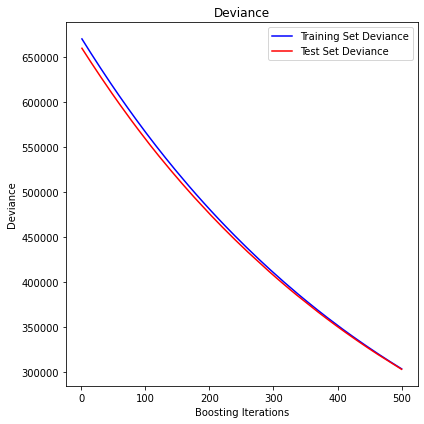

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
# Initialize the structured data regressor.
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data regressor with training data.

history = reg.fit(
    # The path to the train.csv file.
    trainjuni,
    # The name of the label column.
    train_labels,
    epochs=150,batch_size=100
)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
True              |?                 |structured_data_block_1/normalize
2                 |?                 |structured_data_block_1/dense_block_1/num_layers
False             |?                 |structured_data_block_1/dense_block_1/use_batchnorm
0                 |?                 |structured_data_block_1/dense_block_1/dropout
32                |?                 |structured_data_block_1/dense_block_1/units_0
32                |?                 |structured_data_block_1/dense_block_1/units_1
0                 |?                 |regression_head_1/dropout
adam              |?                 |optimizer
0.001             |?                 |learning_rate

Epoch 1/150
149/149 [==============================] - 4s 7ms/step - loss: 2024132.5000 - mean_squared_error: 2024132.5000 - val_loss: 1924500.0000 - val_mean_squared_error: 1924500.0000
Epoch 2/150
149/149 [==============================] - 1s 7ms/step 

KeyboardInterrupt: ignored

In [ ]:
model = reg.export_model()

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

try:
    model.save("model_autokeras28.h5", save_format="tf")
except Exception:
    model.save("model_autokeras28")

<class 'keras.engine.functional.Functional'>
INFO:tensorflow:Assets written to: model_autokeras28\assets


In [ ]:
preds = model.predict(test_features)

162/162 [==============================] - 2s 4ms/step


In [ ]:
predictions28 = model.predict(test_features)
predictions28 = np.squeeze(predictions28)
results_df28 = pd.DataFrame({'prediction':predictions28})

# Saving prediction
results_df28.to_csv('predictions28.csv',index=False)

162/162 [==============================] - 1s 4ms/step


In [ ]:
model.load_weights("model_autokeras28")

In [ ]:
trainft = train_features[['store__n_open_registers', 
    'cashier__item_scan_rate_per_min',
    'register__peak_sales_dollar_amt_per_hour',
    'register__sales_quantity_rescanned_frac',
    'store__occupancy_outdoors',
    'region__n_open_registers',
    'region__peak_sales_dollar_amt_per_hour',
    'hour_of_day']]

In [ ]:
# Initialize the structured data regressor.
reg = ak.StructuredDataRegressor(
    model.set_weights(model.get_weights()), 
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data regressor with training data.

history = reg.fit(
    # The path to the train.csv file.
    train_features,
    # The name of the label column.
    train_labels,
    epochs=1050,batch_size=100
)


Trial 3 Complete [00h 07m 11s]
val_loss: 37926.53125

Best val_loss So Far: 37888.01171875
Total elapsed time: 00h 19m 00s
INFO:tensorflow:Oracle triggered exit
Epoch 1/1050
186/186 [==============================] - 3s 6ms/step - loss: 1916897.0000 - mean_squared_error: 1916897.0000
Epoch 2/1050
186/186 [==============================] - 1s 4ms/step - loss: 915884.9375 - mean_squared_error: 915884.9375
Epoch 3/1050
186/186 [==============================] - 1s 4ms/step - loss: 351102.7188 - mean_squared_error: 351102.7188
Epoch 4/1050
186/186 [==============================] - 1s 4ms/step - loss: 230406.3125 - mean_squared_error: 230406.3125
Epoch 5/1050
186/186 [==============================] - 1s 4ms/step - loss: 181654.1094 - mean_squared_error: 181654.1094
Epoch 6/1050
186/186 [==============================] - 1s 4ms/step - loss: 156189.8281 - mean_squared_error: 156189.8281
Epoch 7/1050
186/186 [==============================] - 1s 4ms/step - loss: 140072.2188 - mean_squared_er

186/186 [==============================] - 1s 4ms/step - loss: 36199.5078 - mean_squared_error: 36199.5078
Epoch 135/1050
186/186 [==============================] - 1s 4ms/step - loss: 36142.3398 - mean_squared_error: 36142.3398
Epoch 136/1050
186/186 [==============================] - 1s 4ms/step - loss: 36123.0156 - mean_squared_error: 36123.0156
Epoch 137/1050
186/186 [==============================] - 1s 5ms/step - loss: 36096.9180 - mean_squared_error: 36096.9180
Epoch 138/1050
186/186 [==============================] - 1s 4ms/step - loss: 36029.9141 - mean_squared_error: 36029.9180
Epoch 139/1050
186/186 [==============================] - 1s 4ms/step - loss: 35940.8359 - mean_squared_error: 35940.8359
Epoch 140/1050
186/186 [==============================] - 1s 5ms/step - loss: 36056.8281 - mean_squared_error: 36056.8281
Epoch 141/1050
186/186 [==============================] - 1s 8ms/step - loss: 35921.8945 - mean_squared_error: 35921.8945
Epoch 142/1050
186/186 [===============

186/186 [==============================] - 1s 4ms/step - loss: 31234.2168 - mean_squared_error: 31234.2168
Epoch 269/1050
186/186 [==============================] - 1s 7ms/step - loss: 31198.4375 - mean_squared_error: 31198.4375
Epoch 270/1050
186/186 [==============================] - 2s 9ms/step - loss: 31190.3340 - mean_squared_error: 31190.3340
Epoch 271/1050
186/186 [==============================] - 1s 6ms/step - loss: 31171.1055 - mean_squared_error: 31171.1055
Epoch 272/1050
186/186 [==============================] - 1s 4ms/step - loss: 31154.7598 - mean_squared_error: 31154.7598
Epoch 273/1050
186/186 [==============================] - 1s 4ms/step - loss: 31130.9766 - mean_squared_error: 31130.9766
Epoch 274/1050
186/186 [==============================] - 1s 5ms/step - loss: 31103.8691 - mean_squared_error: 31103.8691
Epoch 275/1050
186/186 [==============================] - 1s 4ms/step - loss: 31098.9082 - mean_squared_error: 31098.9082
Epoch 276/1050
186/186 [===============

186/186 [==============================] - 1s 4ms/step - loss: 29279.4121 - mean_squared_error: 29279.4121
Epoch 403/1050
186/186 [==============================] - 1s 4ms/step - loss: 29344.5469 - mean_squared_error: 29344.5469
Epoch 404/1050
186/186 [==============================] - 1s 4ms/step - loss: 29379.4473 - mean_squared_error: 29379.4512
Epoch 405/1050
186/186 [==============================] - 1s 4ms/step - loss: 29353.2891 - mean_squared_error: 29353.2891
Epoch 406/1050
186/186 [==============================] - 1s 4ms/step - loss: 29277.7383 - mean_squared_error: 29277.7383
Epoch 407/1050
186/186 [==============================] - 1s 4ms/step - loss: 29226.9863 - mean_squared_error: 29226.9863
Epoch 408/1050
186/186 [==============================] - 1s 4ms/step - loss: 29193.0645 - mean_squared_error: 29193.0645
Epoch 409/1050
186/186 [==============================] - 1s 5ms/step - loss: 29166.5781 - mean_squared_error: 29166.5781
Epoch 410/1050
186/186 [===============

186/186 [==============================] - 1s 4ms/step - loss: 28196.8359 - mean_squared_error: 28196.8359
Epoch 537/1050
186/186 [==============================] - 1s 4ms/step - loss: 28115.9004 - mean_squared_error: 28115.9004
Epoch 538/1050
186/186 [==============================] - 1s 4ms/step - loss: 28051.1973 - mean_squared_error: 28051.1973
Epoch 539/1050
186/186 [==============================] - 1s 5ms/step - loss: 28014.3945 - mean_squared_error: 28014.3945
Epoch 540/1050
186/186 [==============================] - 1s 5ms/step - loss: 27993.4590 - mean_squared_error: 27993.4590
Epoch 541/1050
186/186 [==============================] - 1s 5ms/step - loss: 28097.8691 - mean_squared_error: 28097.8691
Epoch 542/1050
186/186 [==============================] - 1s 5ms/step - loss: 28191.1738 - mean_squared_error: 28191.1738
Epoch 543/1050
186/186 [==============================] - 1s 5ms/step - loss: 28226.8047 - mean_squared_error: 28226.8047
Epoch 544/1050
186/186 [===============

186/186 [==============================] - 1s 4ms/step - loss: 27140.9355 - mean_squared_error: 27140.9355
Epoch 671/1050
186/186 [==============================] - 1s 4ms/step - loss: 27128.0664 - mean_squared_error: 27128.0664
Epoch 672/1050
186/186 [==============================] - 1s 4ms/step - loss: 27117.2656 - mean_squared_error: 27117.2656
Epoch 673/1050
186/186 [==============================] - 1s 4ms/step - loss: 27113.7422 - mean_squared_error: 27113.7422
Epoch 674/1050
186/186 [==============================] - 1s 4ms/step - loss: 27112.8379 - mean_squared_error: 27112.8398
Epoch 675/1050
186/186 [==============================] - 1s 6ms/step - loss: 27109.4902 - mean_squared_error: 27109.4902
Epoch 676/1050
186/186 [==============================] - 1s 4ms/step - loss: 27096.2988 - mean_squared_error: 27096.2988
Epoch 677/1050
186/186 [==============================] - 1s 6ms/step - loss: 27098.5781 - mean_squared_error: 27098.5781
Epoch 678/1050
186/186 [===============

186/186 [==============================] - 1s 4ms/step - loss: 26180.8262 - mean_squared_error: 26180.8262
Epoch 805/1050
186/186 [==============================] - 1s 4ms/step - loss: 26164.9688 - mean_squared_error: 26164.9688
Epoch 806/1050
186/186 [==============================] - 1s 4ms/step - loss: 26163.0000 - mean_squared_error: 26163.0000
Epoch 807/1050
186/186 [==============================] - 1s 5ms/step - loss: 26151.1914 - mean_squared_error: 26151.1914
Epoch 808/1050
186/186 [==============================] - 1s 5ms/step - loss: 26148.6191 - mean_squared_error: 26148.6191
Epoch 809/1050
186/186 [==============================] - 1s 5ms/step - loss: 26145.8262 - mean_squared_error: 26145.8262
Epoch 810/1050
186/186 [==============================] - 1s 5ms/step - loss: 26145.2500 - mean_squared_error: 26145.2500
Epoch 811/1050
186/186 [==============================] - 1s 4ms/step - loss: 26164.7070 - mean_squared_error: 26164.7070
Epoch 812/1050
186/186 [===============

186/186 [==============================] - 1s 4ms/step - loss: 25708.1270 - mean_squared_error: 25708.1270
Epoch 939/1050
186/186 [==============================] - 1s 4ms/step - loss: 25712.5410 - mean_squared_error: 25712.5410
Epoch 940/1050
186/186 [==============================] - 1s 4ms/step - loss: 25709.3164 - mean_squared_error: 25709.3164
Epoch 941/1050
186/186 [==============================] - 1s 4ms/step - loss: 25711.5938 - mean_squared_error: 25711.5938
Epoch 942/1050
186/186 [==============================] - 1s 4ms/step - loss: 25696.2871 - mean_squared_error: 25696.2871
Epoch 943/1050
186/186 [==============================] - 1s 4ms/step - loss: 25709.0410 - mean_squared_error: 25709.0391
Epoch 944/1050
186/186 [==============================] - 1s 4ms/step - loss: 25701.7305 - mean_squared_error: 25701.7305
Epoch 945/1050
186/186 [==============================] - 1s 4ms/step - loss: 25688.9883 - mean_squared_error: 25688.9922
Epoch 946/1050
186/186 [===============

In [ ]:
preds = model.predict(testft)

162/162 [==============================] - 1s 2ms/step


In [ ]:
model = reg.export_model()

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

try:
    model.save("model_autokeras2880.h5", save_format="tf")
except Exception:
    model.save("model_autokeras2880")

<class 'keras.engine.functional.Functional'>
INFO:tensorflow:Assets written to: model_autokeras2880\assets


In [ ]:
predictions2880 = model.predict(test_features)
predictions2880 = np.squeeze(predictions2880)
results_df2880 = pd.DataFrame({'prediction':predictions2880})

# Saving prediction
results_df2880.to_csv('predictions2880.csv',index=False)

162/162 [==============================] - 1s 4ms/step


In [ ]:
model = reg.export_model()

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

try:
    model.save("model_autokeras4.h5", save_format="tf")
except Exception:
    model.save("model_autokeras4")

<class 'keras.engine.functional.Functional'>
INFO:tensorflow:Assets written to: model_autokeras4\assets


In [ ]:
# Initialize the structured data regressor.
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data regressor with training data.

history = reg.fit(
    # The path to the train.csv file.
    train_features,
    # The name of the label column.
    train_labels,
    epochs=450
)

Trial 1 Complete [00h 07m 00s]
val_loss: 38263.40234375

Best val_loss So Far: 38263.40234375
Total elapsed time: 00h 07m 00s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
True              |True              |structured_data_block_1/normalize
False             |False             |structured_data_block_1/dense_block_1/use_batchnorm
2                 |2                 |structured_data_block_1/dense_block_1/num_layers
32                |32                |structured_data_block_1/dense_block_1/units_0
0                 |0                 |structured_data_block_1/dense_block_1/dropout
32                |32                |structured_data_block_1/dense_block_1/units_1
0                 |0                 |regression_head_1/dropout
adam              |adam              |optimizer
0.001             |0.001             |learning_rate

Epoch 1/450
464/464 [==============================] - 8s 7ms/step - loss: 1223044.7500 - mean_squared_error: 1223044.7500 - val

464/464 [==============================] - 2s 5ms/step - loss: 38209.5508 - mean_squared_error: 38209.5508 - val_loss: 40640.2539 - val_mean_squared_error: 40640.2539
Epoch 87/450
464/464 [==============================] - 2s 4ms/step - loss: 38004.0312 - mean_squared_error: 38004.0312 - val_loss: 40581.8047 - val_mean_squared_error: 40581.8047
Epoch 88/450
464/464 [==============================] - 3s 6ms/step - loss: 38264.0820 - mean_squared_error: 38264.0820 - val_loss: 40555.8477 - val_mean_squared_error: 40555.8477
Epoch 89/450
464/464 [==============================] - 3s 6ms/step - loss: 38284.9609 - mean_squared_error: 38284.9609 - val_loss: 40558.0977 - val_mean_squared_error: 40558.0977
Epoch 90/450
464/464 [==============================] - 3s 7ms/step - loss: 37746.6367 - mean_squared_error: 37746.6367 - val_loss: 40518.3281 - val_mean_squared_error: 40518.3281
Epoch 91/450
464/464 [==============================] - 2s 4ms/step - loss: 37560.0586 - mean_squared_error: 3756

KeyboardInterrupt: 

In [ ]:
preds = model.predict(test_features)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 59)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 59)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 59)               119       
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                1920      
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

In [ ]:
model1 = model.load_weights("model_autokeras4")

In [ ]:
# Initialize the structured data regressor.
reg = ak.StructuredDataRegressor(
    model.set_weights(model.get_weights()),  
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data regressor with training data.

history = reg.fit(
    # The path to the train.csv file.
    train_features,
    # The name of the label column.
    train_labels,
    epochs=4000,batch_size=100
)

Trial 3 Complete [00h 02m 39s]
val_loss: 42831.1171875

Best val_loss So Far: 37232.109375
Total elapsed time: 00h 15m 27s
INFO:tensorflow:Oracle triggered exit
Epoch 1/4000
186/186 [==============================] - 2s 4ms/step - loss: 1923482.8750 - mean_squared_error: 1923482.8750
Epoch 2/4000
186/186 [==============================] - 1s 4ms/step - loss: 859329.5625 - mean_squared_error: 859329.5625
Epoch 3/4000
186/186 [==============================] - 1s 4ms/step - loss: 298513.6562 - mean_squared_error: 298513.6562
Epoch 4/4000
186/186 [==============================] - 1s 4ms/step - loss: 207719.2500 - mean_squared_error: 207719.2500
Epoch 5/4000
186/186 [==============================] - 1s 5ms/step - loss: 169925.3750 - mean_squared_error: 169925.3750
Epoch 6/4000
186/186 [==============================] - 1s 5ms/step - loss: 148103.2812 - mean_squared_error: 148103.2812
Epoch 7/4000
186/186 [==============================] - 1s 7ms/step - loss: 133630.1250 - mean_squared_er

186/186 [==============================] - 1s 4ms/step - loss: 36790.3086 - mean_squared_error: 36790.3086
Epoch 135/4000
186/186 [==============================] - 1s 5ms/step - loss: 36625.8320 - mean_squared_error: 36625.8320
Epoch 136/4000
186/186 [==============================] - 1s 5ms/step - loss: 37168.7773 - mean_squared_error: 37168.7773
Epoch 137/4000
186/186 [==============================] - 1s 4ms/step - loss: 36738.9336 - mean_squared_error: 36738.9336
Epoch 138/4000
186/186 [==============================] - 1s 4ms/step - loss: 36401.0898 - mean_squared_error: 36401.0898
Epoch 139/4000
186/186 [==============================] - 1s 4ms/step - loss: 36254.9531 - mean_squared_error: 36254.9531
Epoch 140/4000
186/186 [==============================] - 1s 4ms/step - loss: 36161.2109 - mean_squared_error: 36161.2109
Epoch 141/4000
186/186 [==============================] - 1s 4ms/step - loss: 36098.6797 - mean_squared_error: 36098.6797
Epoch 142/4000
186/186 [===============

186/186 [==============================] - 1s 5ms/step - loss: 31910.2305 - mean_squared_error: 31910.2305
Epoch 269/4000
186/186 [==============================] - 1s 5ms/step - loss: 31699.6680 - mean_squared_error: 31699.6680
Epoch 270/4000
186/186 [==============================] - 1s 5ms/step - loss: 31627.1055 - mean_squared_error: 31627.1055
Epoch 271/4000
186/186 [==============================] - 1s 4ms/step - loss: 31652.6504 - mean_squared_error: 31652.6504
Epoch 272/4000
186/186 [==============================] - 1s 4ms/step - loss: 31689.3008 - mean_squared_error: 31689.3008
Epoch 273/4000
186/186 [==============================] - 1s 4ms/step - loss: 32101.1855 - mean_squared_error: 32101.1855
Epoch 274/4000
186/186 [==============================] - 1s 4ms/step - loss: 31870.0371 - mean_squared_error: 31870.0371
Epoch 275/4000
186/186 [==============================] - 1s 4ms/step - loss: 31461.0137 - mean_squared_error: 31461.0137
Epoch 276/4000
186/186 [===============

186/186 [==============================] - 1s 4ms/step - loss: 29596.3418 - mean_squared_error: 29596.3418
Epoch 403/4000
186/186 [==============================] - 1s 4ms/step - loss: 29582.2539 - mean_squared_error: 29582.2539
Epoch 404/4000
186/186 [==============================] - 1s 4ms/step - loss: 29573.3379 - mean_squared_error: 29573.3379
Epoch 405/4000
186/186 [==============================] - 1s 4ms/step - loss: 29564.8477 - mean_squared_error: 29564.8477
Epoch 406/4000
186/186 [==============================] - 1s 4ms/step - loss: 29606.4746 - mean_squared_error: 29606.4746
Epoch 407/4000
186/186 [==============================] - 1s 4ms/step - loss: 29868.4980 - mean_squared_error: 29868.4980
Epoch 408/4000
186/186 [==============================] - 1s 4ms/step - loss: 30247.8965 - mean_squared_error: 30247.8965
Epoch 409/4000
186/186 [==============================] - 1s 5ms/step - loss: 29517.7734 - mean_squared_error: 29517.7734
Epoch 410/4000
186/186 [===============

186/186 [==============================] - 1s 4ms/step - loss: 28419.2754 - mean_squared_error: 28419.2754
Epoch 537/4000
186/186 [==============================] - 1s 4ms/step - loss: 28392.5938 - mean_squared_error: 28392.5938
Epoch 538/4000
186/186 [==============================] - 1s 5ms/step - loss: 28343.3418 - mean_squared_error: 28343.3418
Epoch 539/4000
186/186 [==============================] - 1s 5ms/step - loss: 28363.9746 - mean_squared_error: 28363.9746
Epoch 540/4000
186/186 [==============================] - 1s 4ms/step - loss: 28356.4121 - mean_squared_error: 28356.4121
Epoch 541/4000
186/186 [==============================] - 1s 5ms/step - loss: 28411.6777 - mean_squared_error: 28411.6777
Epoch 542/4000
186/186 [==============================] - 1s 5ms/step - loss: 28533.7324 - mean_squared_error: 28533.7324
Epoch 543/4000
186/186 [==============================] - 1s 4ms/step - loss: 28662.0781 - mean_squared_error: 28662.0781
Epoch 544/4000
186/186 [===============

186/186 [==============================] - 1s 5ms/step - loss: 27485.5625 - mean_squared_error: 27485.5625
Epoch 671/4000
186/186 [==============================] - 1s 5ms/step - loss: 27503.0684 - mean_squared_error: 27503.0684
Epoch 672/4000
186/186 [==============================] - 1s 4ms/step - loss: 27454.6113 - mean_squared_error: 27454.6113
Epoch 673/4000
186/186 [==============================] - 1s 8ms/step - loss: 27462.3594 - mean_squared_error: 27462.3594
Epoch 674/4000
186/186 [==============================] - 1s 5ms/step - loss: 27430.7051 - mean_squared_error: 27430.7051
Epoch 675/4000
186/186 [==============================] - 1s 6ms/step - loss: 27440.8125 - mean_squared_error: 27440.8125
Epoch 676/4000
186/186 [==============================] - 1s 5ms/step - loss: 27417.7754 - mean_squared_error: 27417.7754
Epoch 677/4000
186/186 [==============================] - 1s 6ms/step - loss: 27449.7793 - mean_squared_error: 27449.7793
Epoch 678/4000
186/186 [===============

186/186 [==============================] - 1s 4ms/step - loss: 26873.8809 - mean_squared_error: 26873.8848
Epoch 805/4000
186/186 [==============================] - 1s 4ms/step - loss: 26885.8203 - mean_squared_error: 26885.8203
Epoch 806/4000
186/186 [==============================] - 1s 4ms/step - loss: 26846.3711 - mean_squared_error: 26846.3711
Epoch 807/4000
186/186 [==============================] - 1s 4ms/step - loss: 26835.1016 - mean_squared_error: 26835.1016
Epoch 808/4000
186/186 [==============================] - 1s 4ms/step - loss: 26796.3301 - mean_squared_error: 26796.3301
Epoch 809/4000
186/186 [==============================] - 1s 4ms/step - loss: 26799.4688 - mean_squared_error: 26799.4688
Epoch 810/4000
186/186 [==============================] - 1s 4ms/step - loss: 26775.2852 - mean_squared_error: 26775.2852
Epoch 811/4000
186/186 [==============================] - 1s 4ms/step - loss: 26801.7520 - mean_squared_error: 26801.7520
Epoch 812/4000
186/186 [===============

186/186 [==============================] - 1s 4ms/step - loss: 26329.7227 - mean_squared_error: 26329.7227
Epoch 939/4000
186/186 [==============================] - 1s 4ms/step - loss: 26161.8164 - mean_squared_error: 26161.8164
Epoch 940/4000
186/186 [==============================] - 1s 4ms/step - loss: 26045.4414 - mean_squared_error: 26045.4453
Epoch 941/4000
186/186 [==============================] - 1s 5ms/step - loss: 26023.9590 - mean_squared_error: 26023.9590
Epoch 942/4000
186/186 [==============================] - 1s 5ms/step - loss: 25998.4883 - mean_squared_error: 25998.4883
Epoch 943/4000
186/186 [==============================] - 1s 5ms/step - loss: 26026.3594 - mean_squared_error: 26026.3594
Epoch 944/4000
186/186 [==============================] - 1s 5ms/step - loss: 26034.3359 - mean_squared_error: 26034.3359
Epoch 945/4000
186/186 [==============================] - 1s 4ms/step - loss: 26125.3418 - mean_squared_error: 26125.3418
Epoch 946/4000
186/186 [===============

186/186 [==============================] - 1s 6ms/step - loss: 25863.1836 - mean_squared_error: 25863.1836
Epoch 1072/4000
186/186 [==============================] - 2s 8ms/step - loss: 25907.8613 - mean_squared_error: 25907.8613
Epoch 1073/4000
186/186 [==============================] - 1s 6ms/step - loss: 25932.3984 - mean_squared_error: 25932.3984
Epoch 1074/4000
186/186 [==============================] - 2s 9ms/step - loss: 25979.9941 - mean_squared_error: 25979.9941
Epoch 1075/4000
186/186 [==============================] - 1s 5ms/step - loss: 25975.5117 - mean_squared_error: 25975.5117
Epoch 1076/4000
186/186 [==============================] - 1s 5ms/step - loss: 26161.2207 - mean_squared_error: 26161.2207
Epoch 1077/4000
186/186 [==============================] - 1s 4ms/step - loss: 26160.5684 - mean_squared_error: 26160.5684
Epoch 1078/4000
186/186 [==============================] - 1s 4ms/step - loss: 26112.6992 - mean_squared_error: 26112.6992
Epoch 1079/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 25474.7383 - mean_squared_error: 25474.7383
Epoch 1204/4000
186/186 [==============================] - 1s 4ms/step - loss: 25483.5566 - mean_squared_error: 25483.5566
Epoch 1205/4000
186/186 [==============================] - 1s 4ms/step - loss: 25467.7598 - mean_squared_error: 25467.7598
Epoch 1206/4000
186/186 [==============================] - 1s 4ms/step - loss: 25472.2734 - mean_squared_error: 25472.2734
Epoch 1207/4000
186/186 [==============================] - 1s 4ms/step - loss: 25465.4082 - mean_squared_error: 25465.4082
Epoch 1208/4000
186/186 [==============================] - 1s 4ms/step - loss: 25461.8945 - mean_squared_error: 25461.8945
Epoch 1209/4000
186/186 [==============================] - 1s 4ms/step - loss: 25461.7305 - mean_squared_error: 25461.7305
Epoch 1210/4000
186/186 [==============================] - 1s 4ms/step - loss: 25460.3789 - mean_squared_error: 25460.3789
Epoch 1211/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 25120.3262 - mean_squared_error: 25120.3262
Epoch 1336/4000
186/186 [==============================] - 1s 4ms/step - loss: 25132.8535 - mean_squared_error: 25132.8535
Epoch 1337/4000
186/186 [==============================] - 1s 4ms/step - loss: 25110.2734 - mean_squared_error: 25110.2734
Epoch 1338/4000
186/186 [==============================] - 1s 4ms/step - loss: 25120.5059 - mean_squared_error: 25120.5059
Epoch 1339/4000
186/186 [==============================] - 1s 4ms/step - loss: 25101.4082 - mean_squared_error: 25101.4082
Epoch 1340/4000
186/186 [==============================] - 1s 4ms/step - loss: 25112.3770 - mean_squared_error: 25112.3770
Epoch 1341/4000
186/186 [==============================] - 1s 4ms/step - loss: 25095.3301 - mean_squared_error: 25095.3301
Epoch 1342/4000
186/186 [==============================] - 1s 4ms/step - loss: 25106.4219 - mean_squared_error: 25106.4219
Epoch 1343/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 24649.5254 - mean_squared_error: 24649.5254
Epoch 1468/4000
186/186 [==============================] - 1s 4ms/step - loss: 24639.6191 - mean_squared_error: 24639.6172
Epoch 1469/4000
186/186 [==============================] - 1s 4ms/step - loss: 24625.3789 - mean_squared_error: 24625.3770
Epoch 1470/4000
186/186 [==============================] - 1s 4ms/step - loss: 24641.9922 - mean_squared_error: 24641.9922
Epoch 1471/4000
186/186 [==============================] - 1s 4ms/step - loss: 24648.4688 - mean_squared_error: 24648.4688
Epoch 1472/4000
186/186 [==============================] - 1s 4ms/step - loss: 24671.8574 - mean_squared_error: 24671.8574
Epoch 1473/4000
186/186 [==============================] - 1s 4ms/step - loss: 24680.3691 - mean_squared_error: 24680.3691
Epoch 1474/4000
186/186 [==============================] - 1s 4ms/step - loss: 24683.5000 - mean_squared_error: 24683.5000
Epoch 1475/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 24417.2246 - mean_squared_error: 24417.2246
Epoch 1600/4000
186/186 [==============================] - 1s 4ms/step - loss: 24428.4375 - mean_squared_error: 24428.4375
Epoch 1601/4000
186/186 [==============================] - 1s 4ms/step - loss: 24411.6211 - mean_squared_error: 24411.6211
Epoch 1602/4000
186/186 [==============================] - 1s 4ms/step - loss: 24425.2891 - mean_squared_error: 24425.2891
Epoch 1603/4000
186/186 [==============================] - 1s 4ms/step - loss: 24409.1973 - mean_squared_error: 24409.1973
Epoch 1604/4000
186/186 [==============================] - 1s 4ms/step - loss: 24417.3496 - mean_squared_error: 24417.3496
Epoch 1605/4000
186/186 [==============================] - 1s 4ms/step - loss: 24394.1602 - mean_squared_error: 24394.1602
Epoch 1606/4000
186/186 [==============================] - 1s 4ms/step - loss: 24408.5000 - mean_squared_error: 24408.5000
Epoch 1607/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 24060.3750 - mean_squared_error: 24060.3750
Epoch 1732/4000
186/186 [==============================] - 1s 4ms/step - loss: 24066.7988 - mean_squared_error: 24066.7988
Epoch 1733/4000
186/186 [==============================] - 1s 4ms/step - loss: 24061.3945 - mean_squared_error: 24061.3984
Epoch 1734/4000
186/186 [==============================] - 1s 4ms/step - loss: 24063.4277 - mean_squared_error: 24063.4316
Epoch 1735/4000
186/186 [==============================] - 1s 4ms/step - loss: 24052.1719 - mean_squared_error: 24052.1719
Epoch 1736/4000
186/186 [==============================] - 1s 4ms/step - loss: 24042.9336 - mean_squared_error: 24042.9336
Epoch 1737/4000
186/186 [==============================] - 1s 4ms/step - loss: 24054.0371 - mean_squared_error: 24054.0371
Epoch 1738/4000
186/186 [==============================] - 1s 4ms/step - loss: 24043.4629 - mean_squared_error: 24043.4629
Epoch 1739/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 23928.9629 - mean_squared_error: 23928.9629
Epoch 1864/4000
186/186 [==============================] - 1s 4ms/step - loss: 23912.9375 - mean_squared_error: 23912.9355
Epoch 1865/4000
186/186 [==============================] - 1s 4ms/step - loss: 23906.2949 - mean_squared_error: 23906.2949
Epoch 1866/4000
186/186 [==============================] - 1s 4ms/step - loss: 23903.7383 - mean_squared_error: 23903.7383
Epoch 1867/4000
186/186 [==============================] - 1s 4ms/step - loss: 23909.5449 - mean_squared_error: 23909.5449
Epoch 1868/4000
186/186 [==============================] - 1s 4ms/step - loss: 23907.9785 - mean_squared_error: 23907.9785
Epoch 1869/4000
186/186 [==============================] - 1s 4ms/step - loss: 23913.3906 - mean_squared_error: 23913.3906
Epoch 1870/4000
186/186 [==============================] - 1s 4ms/step - loss: 23898.0645 - mean_squared_error: 23898.0645
Epoch 1871/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 23636.1680 - mean_squared_error: 23636.1680
Epoch 1996/4000
186/186 [==============================] - 1s 4ms/step - loss: 23623.6348 - mean_squared_error: 23623.6348
Epoch 1997/4000
186/186 [==============================] - 1s 4ms/step - loss: 23618.8477 - mean_squared_error: 23618.8477
Epoch 1998/4000
186/186 [==============================] - 1s 4ms/step - loss: 23602.3574 - mean_squared_error: 23602.3574
Epoch 1999/4000
186/186 [==============================] - 1s 4ms/step - loss: 23633.8848 - mean_squared_error: 23633.8867
Epoch 2000/4000
186/186 [==============================] - 1s 4ms/step - loss: 23612.3574 - mean_squared_error: 23612.3574
Epoch 2001/4000
186/186 [==============================] - 1s 4ms/step - loss: 23626.6113 - mean_squared_error: 23626.6113
Epoch 2002/4000
186/186 [==============================] - 1s 4ms/step - loss: 23603.1875 - mean_squared_error: 23603.1875
Epoch 2003/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 23424.3066 - mean_squared_error: 23424.3066
Epoch 2128/4000
186/186 [==============================] - 1s 4ms/step - loss: 23394.6309 - mean_squared_error: 23394.6309
Epoch 2129/4000
186/186 [==============================] - 1s 4ms/step - loss: 23426.0469 - mean_squared_error: 23426.0469
Epoch 2130/4000
186/186 [==============================] - 1s 4ms/step - loss: 23404.6641 - mean_squared_error: 23404.6641
Epoch 2131/4000
186/186 [==============================] - 1s 4ms/step - loss: 23426.5449 - mean_squared_error: 23426.5449
Epoch 2132/4000
186/186 [==============================] - 1s 4ms/step - loss: 23404.5938 - mean_squared_error: 23404.5938
Epoch 2133/4000
186/186 [==============================] - 1s 4ms/step - loss: 23414.7695 - mean_squared_error: 23414.7695
Epoch 2134/4000
186/186 [==============================] - 1s 4ms/step - loss: 23389.7422 - mean_squared_error: 23389.7422
Epoch 2135/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 23234.4023 - mean_squared_error: 23234.4023
Epoch 2260/4000
186/186 [==============================] - 1s 4ms/step - loss: 23213.7461 - mean_squared_error: 23213.7461
Epoch 2261/4000
186/186 [==============================] - 1s 4ms/step - loss: 23239.7266 - mean_squared_error: 23239.7266
Epoch 2262/4000
186/186 [==============================] - 1s 4ms/step - loss: 23217.6660 - mean_squared_error: 23217.6660
Epoch 2263/4000
186/186 [==============================] - 1s 4ms/step - loss: 23235.2461 - mean_squared_error: 23235.2461
Epoch 2264/4000
186/186 [==============================] - 1s 4ms/step - loss: 23201.2324 - mean_squared_error: 23201.2324
Epoch 2265/4000
186/186 [==============================] - 1s 4ms/step - loss: 23221.9902 - mean_squared_error: 23221.9902
Epoch 2266/4000
186/186 [==============================] - 1s 4ms/step - loss: 23205.2324 - mean_squared_error: 23205.2344
Epoch 2267/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 23065.4434 - mean_squared_error: 23065.4434
Epoch 2392/4000
186/186 [==============================] - 1s 4ms/step - loss: 23033.8574 - mean_squared_error: 23033.8574
Epoch 2393/4000
186/186 [==============================] - 1s 4ms/step - loss: 23071.8066 - mean_squared_error: 23071.8066
Epoch 2394/4000
186/186 [==============================] - 1s 4ms/step - loss: 23053.4668 - mean_squared_error: 23053.4668
Epoch 2395/4000
186/186 [==============================] - 1s 4ms/step - loss: 23062.7344 - mean_squared_error: 23062.7344
Epoch 2396/4000
186/186 [==============================] - 1s 4ms/step - loss: 23033.2168 - mean_squared_error: 23033.2168
Epoch 2397/4000
186/186 [==============================] - 1s 4ms/step - loss: 23059.0078 - mean_squared_error: 23059.0078
Epoch 2398/4000
186/186 [==============================] - 1s 4ms/step - loss: 23001.5742 - mean_squared_error: 23001.5742
Epoch 2399/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 22916.7402 - mean_squared_error: 22916.7402
Epoch 2524/4000
186/186 [==============================] - 1s 4ms/step - loss: 22900.8281 - mean_squared_error: 22900.8281
Epoch 2525/4000
186/186 [==============================] - 1s 4ms/step - loss: 22916.6113 - mean_squared_error: 22916.6113
Epoch 2526/4000
186/186 [==============================] - 1s 4ms/step - loss: 22892.9102 - mean_squared_error: 22892.9102
Epoch 2527/4000
186/186 [==============================] - 1s 4ms/step - loss: 22913.8086 - mean_squared_error: 22913.8086
Epoch 2528/4000
186/186 [==============================] - 1s 4ms/step - loss: 22905.1504 - mean_squared_error: 22905.1504
Epoch 2529/4000
186/186 [==============================] - 1s 4ms/step - loss: 22914.7285 - mean_squared_error: 22914.7285
Epoch 2530/4000
186/186 [==============================] - 1s 4ms/step - loss: 22887.5488 - mean_squared_error: 22887.5488
Epoch 2531/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 22795.6855 - mean_squared_error: 22795.6855
Epoch 2656/4000
186/186 [==============================] - 1s 4ms/step - loss: 22769.0000 - mean_squared_error: 22769.0000
Epoch 2657/4000
186/186 [==============================] - 1s 4ms/step - loss: 22799.8711 - mean_squared_error: 22799.8711
Epoch 2658/4000
186/186 [==============================] - 1s 4ms/step - loss: 22784.0195 - mean_squared_error: 22784.0195
Epoch 2659/4000
186/186 [==============================] - 1s 4ms/step - loss: 22795.3301 - mean_squared_error: 22795.3301
Epoch 2660/4000
186/186 [==============================] - 1s 4ms/step - loss: 22771.5488 - mean_squared_error: 22771.5488
Epoch 2661/4000
186/186 [==============================] - 1s 4ms/step - loss: 22793.5508 - mean_squared_error: 22793.5508
Epoch 2662/4000
186/186 [==============================] - 1s 4ms/step - loss: 22765.3379 - mean_squared_error: 22765.3379
Epoch 2663/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 22668.4453 - mean_squared_error: 22668.4453
Epoch 2788/4000
186/186 [==============================] - 1s 4ms/step - loss: 22646.5645 - mean_squared_error: 22646.5645
Epoch 2789/4000
186/186 [==============================] - 1s 4ms/step - loss: 22666.6328 - mean_squared_error: 22666.6328
Epoch 2790/4000
186/186 [==============================] - 1s 4ms/step - loss: 22647.1270 - mean_squared_error: 22647.1270
Epoch 2791/4000
186/186 [==============================] - 1s 4ms/step - loss: 22661.9707 - mean_squared_error: 22661.9707
Epoch 2792/4000
186/186 [==============================] - 1s 4ms/step - loss: 22640.5645 - mean_squared_error: 22640.5645
Epoch 2793/4000
186/186 [==============================] - 1s 4ms/step - loss: 22666.0156 - mean_squared_error: 22666.0156
Epoch 2794/4000
186/186 [==============================] - 1s 4ms/step - loss: 22641.1582 - mean_squared_error: 22641.1582
Epoch 2795/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 22553.3320 - mean_squared_error: 22553.3320
Epoch 2920/4000
186/186 [==============================] - 1s 4ms/step - loss: 22522.0449 - mean_squared_error: 22522.0449
Epoch 2921/4000
186/186 [==============================] - 1s 4ms/step - loss: 22554.5625 - mean_squared_error: 22554.5625
Epoch 2922/4000
186/186 [==============================] - 1s 4ms/step - loss: 22536.3867 - mean_squared_error: 22536.3867
Epoch 2923/4000
186/186 [==============================] - 1s 4ms/step - loss: 22541.9199 - mean_squared_error: 22541.9199
Epoch 2924/4000
186/186 [==============================] - 1s 4ms/step - loss: 22516.4531 - mean_squared_error: 22516.4531
Epoch 2925/4000
186/186 [==============================] - 1s 4ms/step - loss: 22538.1367 - mean_squared_error: 22538.1348
Epoch 2926/4000
186/186 [==============================] - 1s 4ms/step - loss: 22508.5840 - mean_squared_error: 22508.5840
Epoch 2927/4000
186/186 [=======

186/186 [==============================] - 1s 4ms/step - loss: 22444.1211 - mean_squared_error: 22444.1230
Epoch 3052/4000
186/186 [==============================] - 1s 4ms/step - loss: 22427.6660 - mean_squared_error: 22427.6660
Epoch 3053/4000
186/186 [==============================] - 1s 4ms/step - loss: 22446.5898 - mean_squared_error: 22446.5898
Epoch 3054/4000
186/186 [==============================] - 1s 4ms/step - loss: 22422.5176 - mean_squared_error: 22422.5176
Epoch 3055/4000
186/186 [==============================] - 1s 4ms/step - loss: 22450.9082 - mean_squared_error: 22450.9082
Epoch 3056/4000
186/186 [==============================] - 1s 4ms/step - loss: 22426.6367 - mean_squared_error: 22426.6367
Epoch 3057/4000
186/186 [==============================] - 1s 4ms/step - loss: 22444.3652 - mean_squared_error: 22444.3652
Epoch 3058/4000
186/186 [==============================] - 1s 4ms/step - loss: 22413.5703 - mean_squared_error: 22413.5664
Epoch 3059/4000
186/186 [=======

186/186 [==============================] - 2s 10ms/step - loss: 22340.2246 - mean_squared_error: 22340.2246
Epoch 3184/4000
186/186 [==============================] - 2s 8ms/step - loss: 22327.9160 - mean_squared_error: 22327.9160
Epoch 3185/4000
186/186 [==============================] - 1s 6ms/step - loss: 22348.9707 - mean_squared_error: 22348.9707
Epoch 3186/4000
186/186 [==============================] - 1s 6ms/step - loss: 22337.6172 - mean_squared_error: 22337.6172
Epoch 3187/4000
186/186 [==============================] - 1s 7ms/step - loss: 22343.4746 - mean_squared_error: 22343.4746
Epoch 3188/4000
186/186 [==============================] - 1s 6ms/step - loss: 22330.3848 - mean_squared_error: 22330.3848
Epoch 3189/4000
186/186 [==============================] - 2s 9ms/step - loss: 22354.3887 - mean_squared_error: 22354.3867
Epoch 3190/4000
186/186 [==============================] - 4s 18ms/step - loss: 22334.7637 - mean_squared_error: 22334.7637
Epoch 3191/4000
186/186 [=====

186/186 [==============================] - 1s 6ms/step - loss: 22272.1738 - mean_squared_error: 22272.1738
Epoch 3316/4000
186/186 [==============================] - 1s 8ms/step - loss: 22262.8750 - mean_squared_error: 22262.8750
Epoch 3317/4000
186/186 [==============================] - 1s 7ms/step - loss: 22270.3984 - mean_squared_error: 22270.3984
Epoch 3318/4000
186/186 [==============================] - 1s 7ms/step - loss: 22271.3867 - mean_squared_error: 22271.3867
Epoch 3319/4000
186/186 [==============================] - 1s 6ms/step - loss: 22266.2773 - mean_squared_error: 22266.2754
Epoch 3320/4000
186/186 [==============================] - 1s 7ms/step - loss: 22249.0449 - mean_squared_error: 22249.0449
Epoch 3321/4000
186/186 [==============================] - 1s 7ms/step - loss: 22277.3848 - mean_squared_error: 22277.3848
Epoch 3322/4000
186/186 [==============================] - 1s 7ms/step - loss: 22250.0527 - mean_squared_error: 22250.0527
Epoch 3323/4000
186/186 [=======

186/186 [==============================] - 1s 7ms/step - loss: 22199.5117 - mean_squared_error: 22199.5117
Epoch 3448/4000
186/186 [==============================] - 1s 8ms/step - loss: 22189.7539 - mean_squared_error: 22189.7520
Epoch 3449/4000
186/186 [==============================] - 1s 8ms/step - loss: 22210.4434 - mean_squared_error: 22210.4434
Epoch 3450/4000
186/186 [==============================] - 2s 10ms/step - loss: 22189.5742 - mean_squared_error: 22189.5742
Epoch 3451/4000
186/186 [==============================] - 1s 7ms/step - loss: 22208.4141 - mean_squared_error: 22208.4141
Epoch 3452/4000
186/186 [==============================] - 1s 7ms/step - loss: 22188.0059 - mean_squared_error: 22188.0059
Epoch 3453/4000
186/186 [==============================] - 1s 6ms/step - loss: 22200.4531 - mean_squared_error: 22200.4531
Epoch 3454/4000
186/186 [==============================] - 1s 6ms/step - loss: 22207.2715 - mean_squared_error: 22207.2715
Epoch 3455/4000
186/186 [======

186/186 [==============================] - 1s 7ms/step - loss: 22142.7891 - mean_squared_error: 22142.7910
Epoch 3580/4000
186/186 [==============================] - 1s 7ms/step - loss: 22101.7969 - mean_squared_error: 22101.7969
Epoch 3581/4000
186/186 [==============================] - 1s 7ms/step - loss: 22095.6465 - mean_squared_error: 22095.6465
Epoch 3582/4000
186/186 [==============================] - 1s 7ms/step - loss: 22110.6914 - mean_squared_error: 22110.6914
Epoch 3583/4000
186/186 [==============================] - 1s 7ms/step - loss: 22147.8965 - mean_squared_error: 22147.8965
Epoch 3584/4000
186/186 [==============================] - 1s 6ms/step - loss: 22131.6816 - mean_squared_error: 22131.6816
Epoch 3585/4000
186/186 [==============================] - 1s 7ms/step - loss: 22130.6211 - mean_squared_error: 22130.6211
Epoch 3586/4000
186/186 [==============================] - 1s 7ms/step - loss: 22110.6113 - mean_squared_error: 22110.6113
Epoch 3587/4000
186/186 [=======

186/186 [==============================] - 2s 9ms/step - loss: 22068.2949 - mean_squared_error: 22068.2949
Epoch 3712/4000
186/186 [==============================] - 1s 7ms/step - loss: 22052.0254 - mean_squared_error: 22052.0254
Epoch 3713/4000
186/186 [==============================] - 1s 6ms/step - loss: 22063.5859 - mean_squared_error: 22063.5859
Epoch 3714/4000
186/186 [==============================] - 1s 6ms/step - loss: 22052.9102 - mean_squared_error: 22052.9102
Epoch 3715/4000
186/186 [==============================] - 1s 5ms/step - loss: 22065.6191 - mean_squared_error: 22065.6191
Epoch 3716/4000
186/186 [==============================] - 1s 6ms/step - loss: 22047.7969 - mean_squared_error: 22047.7969
Epoch 3717/4000
186/186 [==============================] - 1s 6ms/step - loss: 22070.3164 - mean_squared_error: 22070.3164
Epoch 3718/4000
186/186 [==============================] - 1s 8ms/step - loss: 22065.1094 - mean_squared_error: 22065.1094
Epoch 3719/4000
186/186 [=======

186/186 [==============================] - 1s 7ms/step - loss: 22009.0117 - mean_squared_error: 22009.0117
Epoch 3844/4000
186/186 [==============================] - 1s 7ms/step - loss: 21994.7812 - mean_squared_error: 21994.7812
Epoch 3845/4000
186/186 [==============================] - 1s 7ms/step - loss: 21998.6191 - mean_squared_error: 21998.6191
Epoch 3846/4000
186/186 [==============================] - 1s 7ms/step - loss: 21986.4297 - mean_squared_error: 21986.4297
Epoch 3847/4000
186/186 [==============================] - 1s 5ms/step - loss: 21998.5781 - mean_squared_error: 21998.5781
Epoch 3848/4000
186/186 [==============================] - 1s 5ms/step - loss: 21996.3496 - mean_squared_error: 21996.3496
Epoch 3849/4000
186/186 [==============================] - 1s 6ms/step - loss: 21993.9316 - mean_squared_error: 21993.9316
Epoch 3850/4000
186/186 [==============================] - 1s 5ms/step - loss: 21980.4473 - mean_squared_error: 21980.4473
Epoch 3851/4000
186/186 [=======

186/186 [==============================] - 1s 7ms/step - loss: 21929.4805 - mean_squared_error: 21929.4805
Epoch 3976/4000
186/186 [==============================] - 1s 8ms/step - loss: 21923.3164 - mean_squared_error: 21923.3164
Epoch 3977/4000
186/186 [==============================] - 1s 8ms/step - loss: 21946.6836 - mean_squared_error: 21946.6836
Epoch 3978/4000
186/186 [==============================] - 2s 9ms/step - loss: 21933.9336 - mean_squared_error: 21933.9336
Epoch 3979/4000
186/186 [==============================] - 1s 7ms/step - loss: 21941.6816 - mean_squared_error: 21941.6816
Epoch 3980/4000
186/186 [==============================] - 2s 8ms/step - loss: 21926.6641 - mean_squared_error: 21926.6641
Epoch 3981/4000
186/186 [==============================] - 1s 8ms/step - loss: 21935.3457 - mean_squared_error: 21935.3457
Epoch 3982/4000
186/186 [==============================] - 2s 8ms/step - loss: 21917.2715 - mean_squared_error: 21917.2715
Epoch 3983/4000
186/186 [=======

In [ ]:
model = reg.export_model()

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

try:
    model.save("model_autokeras5.h5", save_format="tf")
except Exception:
    model.save("model_autokeras5")

<class 'keras.engine.functional.Functional'>
INFO:tensorflow:Assets written to: model_autokeras6\assets


In [ ]:
predictions = model.predict(test_data)
predictions = np.squeeze(predictions)
results_df = pd.DataFrame({'prediction':predictions})

# Saving prediction
results_df.to_csv('predictions1.csv',index=False)

162/162 [==============================] - 1s 5ms/step


In [ ]:
print(predictions)

[1685.81   398.375 1360.849 ... 1099.684  741.858 1088.833]


In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model_autokeras28')
model2 = load_model('model_autokeras80')
#model3 = model('/content/6.h5')

In [ ]:
model1 = model.load_weights("model_autokeras80")

In [ ]:
model2 = model.load_weights("model_autokeras80")

In [ ]:
model3 = model.load_weights("model_autokeras6")

In [ ]:
preds2 = model.predict(test_data)

162/162 [==============================] - 1s 4ms/step


In [ ]:
final_preds

array([[1112.635],
       [ 262.927],
       [ 898.16 ],
       ...,
       [ 725.792],
       [ 489.627],
       [ 718.63 ]], dtype=float32)